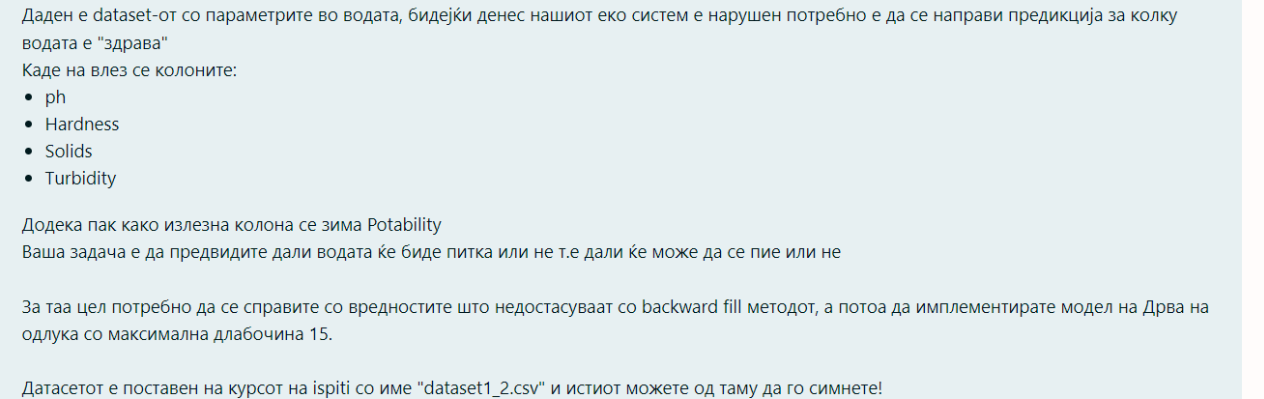

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
data.drop('Chloramines',axis = 1, inplace = True)
data.drop('Sulfate',axis = 1, inplace = True)
data.drop('Conductivity',axis = 1, inplace = True)
data.drop('Organic_carbon',axis = 1, inplace = True)
data.drop('Trihalomethanes',axis = 1, inplace = True)

In [ ]:
data.head()

,ph,Hardness,Solids,Turbidity,Potability
0,NaN,204.890455,20791.318981,2.963135,0
1,3.716080,129.422921,18630.057858,4.500656,0
2,8.099124,224.236259,19909.541732,3.055934,0
3,8.316766,214.373394,22018.417441,4.628771,0
4,9.092223,181.101509,17978.986339,4.075075,0


In [ ]:
data.isnull().sum()

ph            491
Hardness        0
Solids          0
Turbidity       0
Potability      0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ph          2785 non-null   float64
 1   Hardness    3276 non-null   float64
 2   Solids      3276 non-null   float64
 3   Turbidity   3276 non-null   float64
 4   Potability  3276 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 128.1 KB


In [ ]:
data['ph'].fillna(method='bfill', inplace=True )

In [ ]:
data.isnull().sum()

ph            0
Hardness      0
Solids        0
Turbidity     0
Potability    0
dtype: int64

In [ ]:
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [ ]:
datawp = data.copy()
datawp.drop('Potability',axis = 1, inplace = True)

In [ ]:
datawp[datawp.columns[1:]]

,Hardness,Solids,Turbidity
0,204.890455,20791.318981,2.963135
1,129.422921,18630.057858,4.500656
2,224.236259,19909.541732,3.055934
3,214.373394,22018.417441,4.628771
4,181.101509,17978.986339,4.075075
...,...,...,...
3271,193.681735,47580.991603,4.435821
3272,193.553212,17329.802160,2.798243
3273,175.762646,33155.578218,3.298875
3274,230.603758,11983.869376,4.708658


In [ ]:
#Split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(datawp[datawp.columns[1:]],data['Potability'], test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=35)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=35)

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

print(confusion_matrix(Y_test, Y_pred))

[[361  44]
 [216  35]]


In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.63      0.89      0.74       405
           1       0.44      0.14      0.21       251

    accuracy                           0.60       656
   macro avg       0.53      0.52      0.47       656
weighted avg       0.56      0.60      0.54       656



In [ ]:
error_rate = []

for i in range(1,40):

  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, Y_train)
  pred_i = knn.predict(X_test)

  error_rate.append(np.mean(pred_i != Y_test))


Text(0, 0.5, 'Error rate')

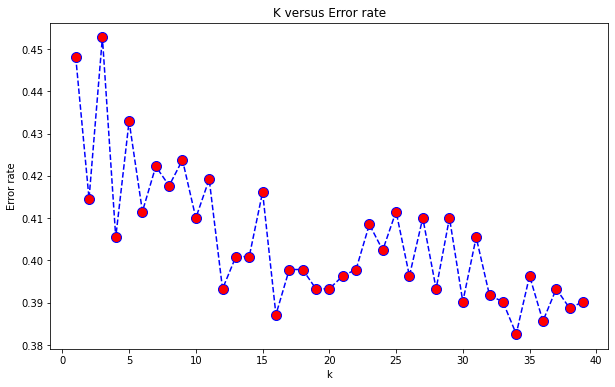

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

plt.plot(range(1,40), error_rate, color='blue', linestyle='--', markersize = 10, markerfacecolor='red', marker='o')

plt.title('K versus Error rate')

plt.xlabel('k')
plt.ylabel('Error rate')